---
<h1 align='center' style="color:green"> Credit Card Fraud Detection</h1>

---

## 1. Importing Necessary Libraries

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load The Data Set
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

## Download the dataset from there <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv" >click here </a>  

Use : [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the dataset from the csv file using pandas. and then print first few columns using .head()
path="/content/creditcard.csv"
df=pd.read_csv(path)


### EXPLORE THE DATA

**Print the columns**

In [ ]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


**Print the shape and description**

In [ ]:
# Print the shape of the data
print(df.shape)

#print description


(27819, 31)


In [ ]:
print(df.describe())

               Time            V1            V2            V3            V4  \
count  27819.000000  27818.000000  27818.000000  27818.000000  27818.000000   
mean   20434.634315     -0.217255      0.149360      0.723559      0.221251   
std    11866.057310      1.866645      1.545773      1.648474      1.425213   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     9037.500000     -0.951060     -0.424408      0.271315     -0.690871   
50%    24675.000000     -0.259642      0.163461      0.855090      0.202149   
75%    31319.000000      1.166130      0.803933      1.483404      1.102574   
max    34712.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  27818.000000  27818.000000  27818.000000  27818.000000  27818.000000   
mean      -0.199312      0.084607     -0.125687      0.028612      0.394412   
std        1.431480      1.325535      1.308413    

**Verify the absence of null values**

Use `data = data.dropna()`,if any.

In [ ]:
null_values = df.isna().sum()
if null_values.sum()>0:
  df=df.dropna()

## Data Visualization

Plot the histograms of each parameter, using .hist() in Matplotlib, and ultimately plt.show(). Learn more about how to do this, by searching online. Note, this is a straightforward code taking no more than 2 lines.

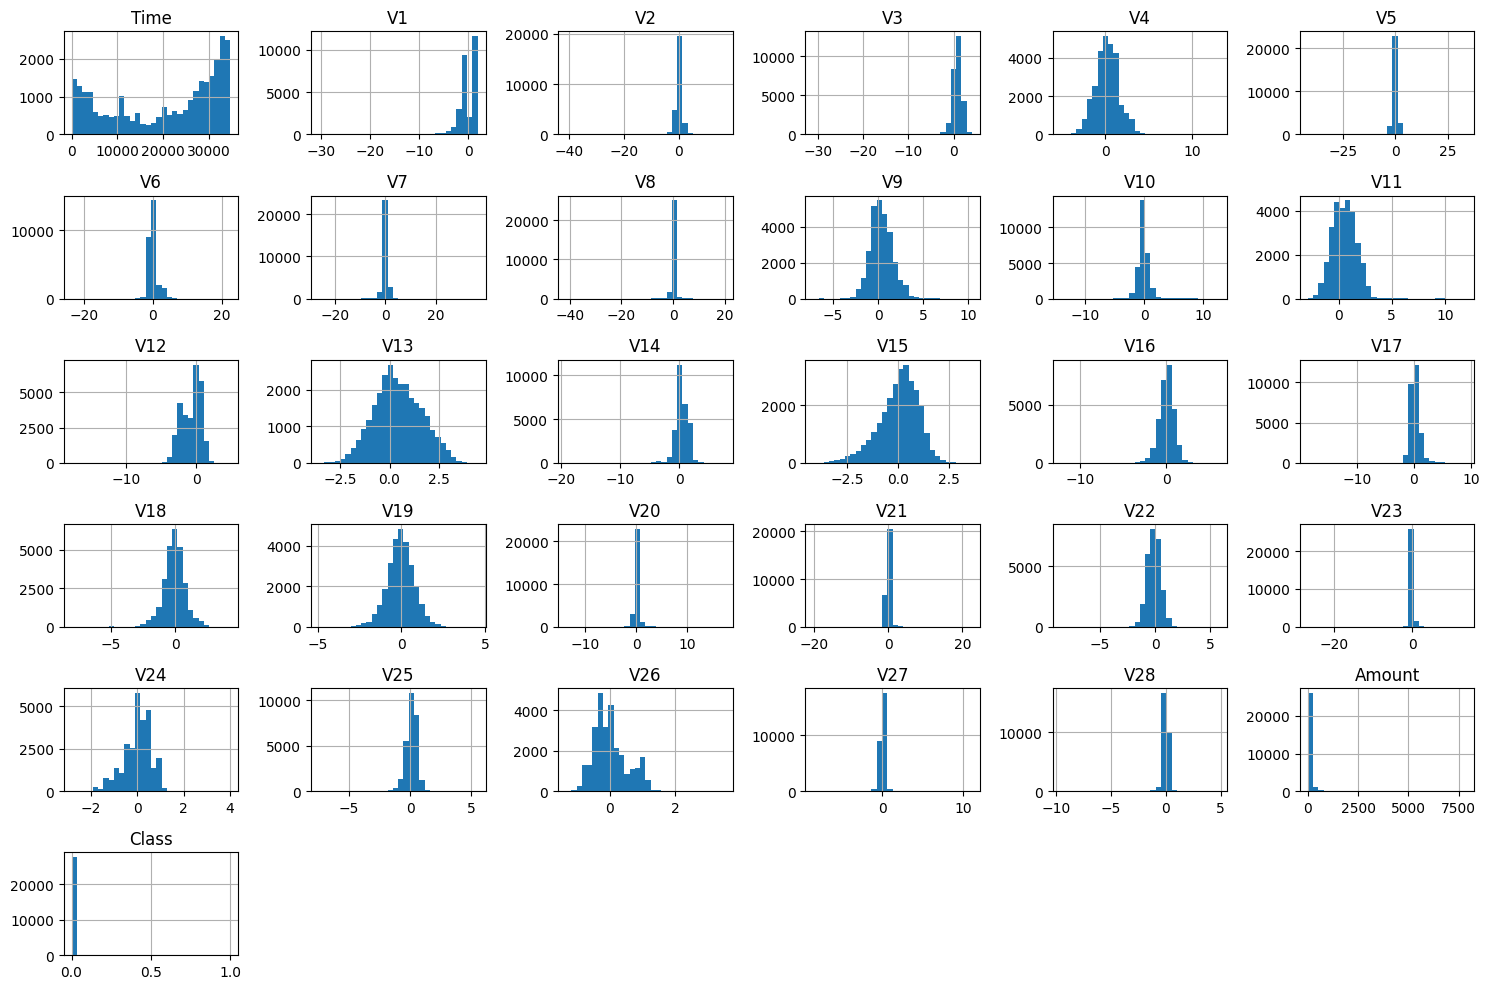

In [ ]:
# Plot histograms of each parameter
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Print the number of**
  1. **Fraud cases**
  2.**Valid Cases**   **from the dataset**

  Do this part by **Boolean Indexing**.


In [ ]:
# Determine number of 1.fraud cases, 2. valid cases.

#code goes here:

# Assume 'Class' column indicates fraud (1 for fraud, 0 for valid)
# Boolean indexing for fraud cases
fraud_cases = df['Class'] == 1
num_fraud_cases = fraud_cases.sum()

# Boolean indexing for valid cases
valid_cases = df['Class'] == 0
num_valid_cases = valid_cases.sum()

print(f"Number of fraud cases: {num_fraud_cases}")
print(f"Number of valid cases: {num_valid_cases}")




Number of fraud cases: 93
Number of valid cases: 27725


**Plot a correlation heatmap using the Seaborn Library(Example)**

Search these up.

1.   pandas.DataFrame.corr
2.   seaborn.heatmap
3.   matplotlib.pyplot.figure
4.   matplotlib.pyplot.show












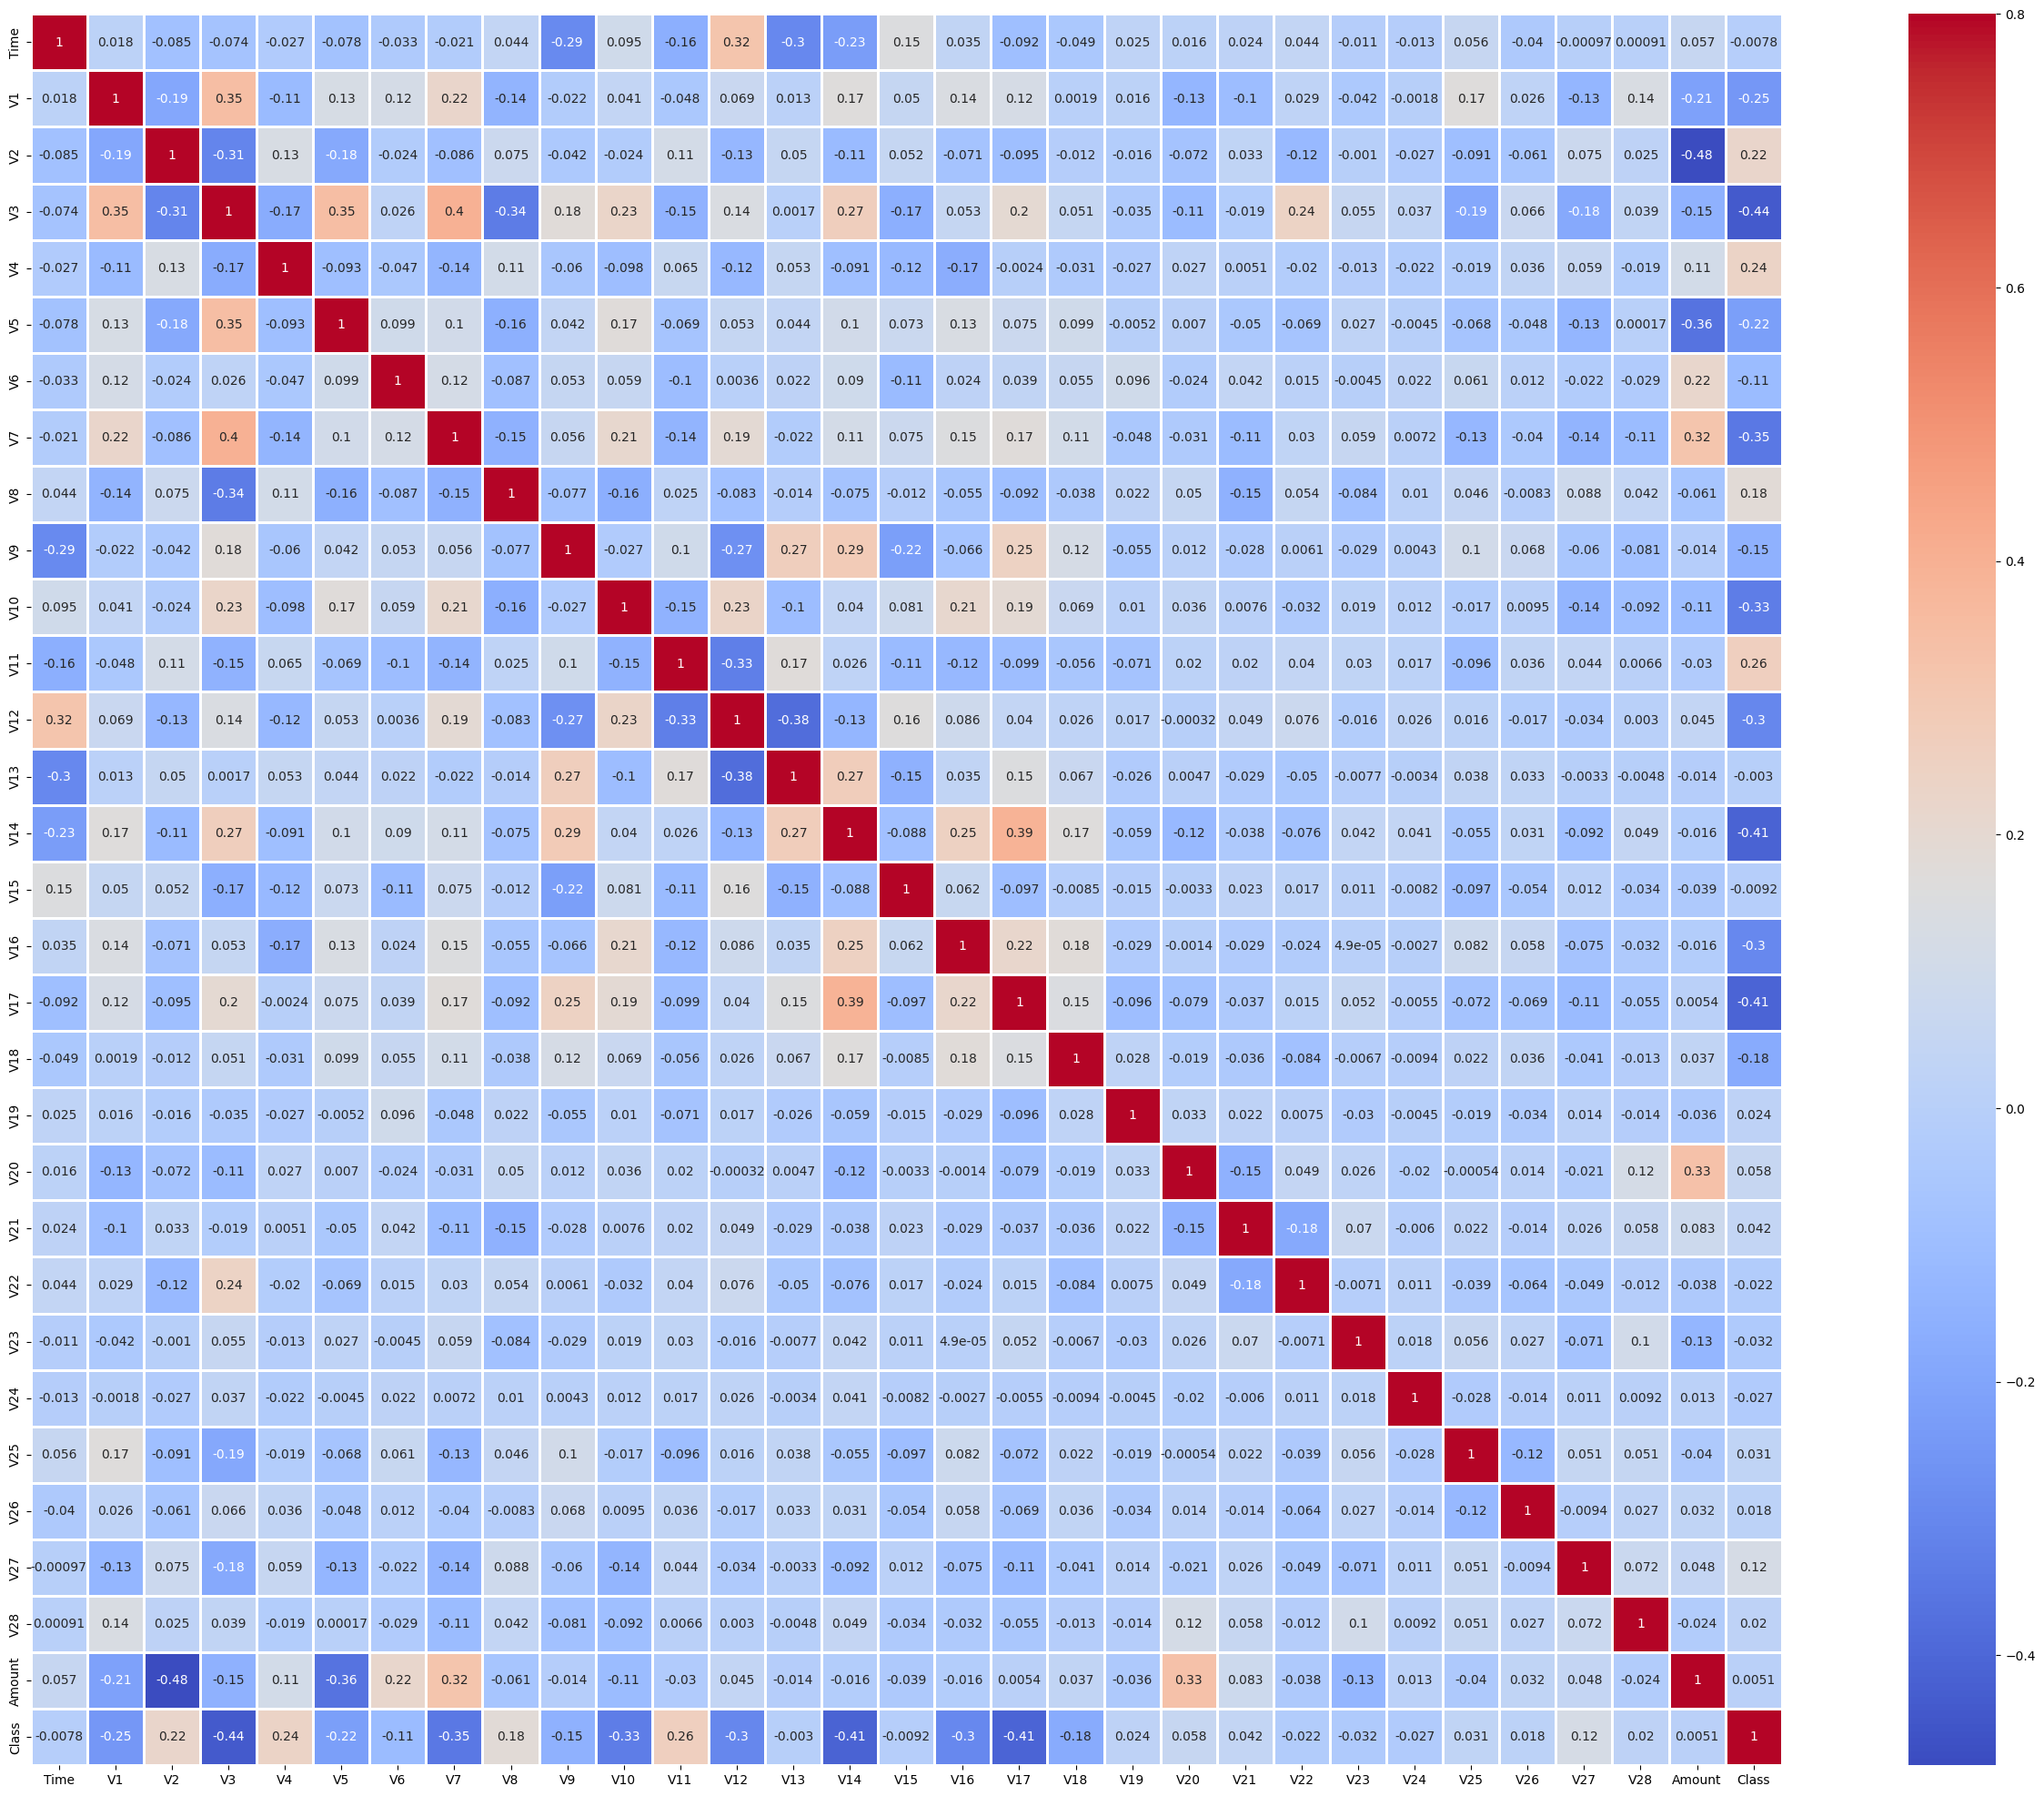

In [ ]:

## Correlation matrix EXAMPLE
corrmat=df.corr()
fig=plt.figure(figsize=(36,25))

sns.heatmap(corrmat, vmax = .8, square = True,annot=True,cmap="coolwarm",linewidth=2)
plt.show()

# Data processing

# Splitting a DataFrame into Features (X) and Target (Y)

In this step, we’ll split the given DataFrame into two parts:

Features (X): These are the columns that we’ll use as input to our machine learning model. They represent the independent variables that help predict the target variable.

Target (Y): This is the column we want to predict. In our case, it’s the “Class” column.

## Instructions:

1. Get All Columns: First, let’s get a list of all the columns in the DataFrame. We’ll use this list to filter out the columns we don’t want.
2. Filter Columns: Remove any columns that are not relevant for our prediction.

In our case, we want to exclude the “Class” column from the features.
Store Variables:
X: Assign the remaining columns (excluding “Class”) to the variable X. These will be our features.
Y: Assign the “Class” column to the variable Y. This will be our target.
Print Shapes: Finally, print the shapes of X and Y to verify that everything is set up correctly.

In [ ]:
# Get all the columns from the dataFrame  [Note: use .tolist()]
all_columns = df.columns.tolist()


# Filter the columns to remove data we do not want (Remove Class columns, because that is our target). store under columns variable.
columns = [col for col in all_columns if col != 'Class']


# Store the variable we'll be predicting on. store under target variable.
target = 'Class'


X = df[columns]  # all the columns data there except class
Y = df[target]   # only Class columns data there


# Print shapes
print("Shape of X (features):", X.shape)
print("Shape of Y (target):", Y.shape)


Shape of X (features): (27818, 30)
Shape of Y (target): (27818,)


## Split data into Train and test datset (20% test and 80% train)

[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# Split data into 80% train and 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)


In [ ]:
#Print shapes of train and test sets of X and Y.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)



Shape of X_train: (22254, 30)
Shape of X_test: (5564, 30)
Shape of Y_train: (22254,)
Shape of Y_test: (5564,)


### Feature Scaling (Example)
#### Converting different units and magnitude data in one unit.
Note that this is general procedure, that is followed. This doesn't make a difference in this dataset, but it is done here as an example. [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)  # convert all data into float data type
X_test_sc=sc.transform(X_test)
X_test_sc.dtype

dtype('float64')

# 3.Machine Learning Model Building

#### We have clean data to build the Ml model. But which Machine learning algorithm is best for the data we have to find. The output is a categorical format so we will use supervised classification machine learning algorithms.

#### To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model.

#### import packages

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree Classifier
**[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

**[Read for finding accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy score
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.9983824586628325


In [ ]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
# Train the model on the training data
clf.fit(X_train_sc, Y_train)

# Make predictions on the test data
Y_pred = clf.predict(X_test_sc)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy score
print(f"Accuracy Score: {accuracy}")



Accuracy Score: 0.9983824586628325


## Random Forest Classifier

In [ ]:
# Random forest classifier, fit on Xtrain achieved by splitting
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf.fit(X_train,Y_train)
y_pred_rf=rf_clf.predict(X_test)
accuracy_score(Y_test,y_pred_rf)

0.9985621854780733

In [ ]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
rf_clf_sc=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf_sc.fit(X_train_sc,Y_train)
y_pred_rf_sc=rf_clf_sc.predict(X_test_sc)
accuracy_score(Y_test,y_pred_rf_sc)

0.9985621854780733

##  AdaBoost Classifier

Treat as example

In [ ]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abd_clf=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                                                  n_estimators=200,
                                                   learning_rate=0.1,
                                                   algorithm="SAMME.R",
                                                   random_state=1, )

abd_clf.fit(X_train,Y_train)
y_pred_abd=abd_clf.predict(X_test)
accuracy_score(Y_test,y_pred_abd)

0.9982027318475917

In [ ]:
# Train with Standard Scalar, fit on X_train_sc achieved by scaling
abd_clf_sc=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                             n_estimators=200,
                             learning_rate=0.1,
                             algorithm="SAMME.R",
                             random_state=1,)
abd_clf_sc.fit(X_train_sc,Y_train)
y_pred_abd_sc=abd_clf_sc.predict(X_test_sc)
accuracy_score(Y_test,y_pred_abd_sc)

0.9982027318475917

##  XGBoost Classifier

[Docs](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

In [ ]:
#Train using XGBoost XGBClassifier. Search it up online, and implement similar to the AdaBoost Classifier above
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the scaled training data
xgb_clf.fit(X_train, Y_train)

# Make predictions on the scaled test data
Y_pred_xgb = xgb_clf.predict(X_test)

# Calculate and print accuracy score
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
print(f"XGBoost Accuracy Score: {accuracy_xgb}")



XGBoost Accuracy Score: 0.998921639108555


In [ ]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)

# Initialize the XGBoost Classifier
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the scaled training data
xgb_clf.fit(X_train_sc, Y_train)

# Make predictions on the scaled test data
Y_pred_xgb = xgb_clf.predict(X_test_sc)

# Calculate and print accuracy score
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
print(f"XGBoost Accuracy Score: {accuracy_xgb}")


XGBoost Accuracy Score: 0.998921639108555


## Confusion Matrix
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
#create confusion matrix under the name "cm"
cm = confusion_matrix(Y_test, Y_pred_xgb)


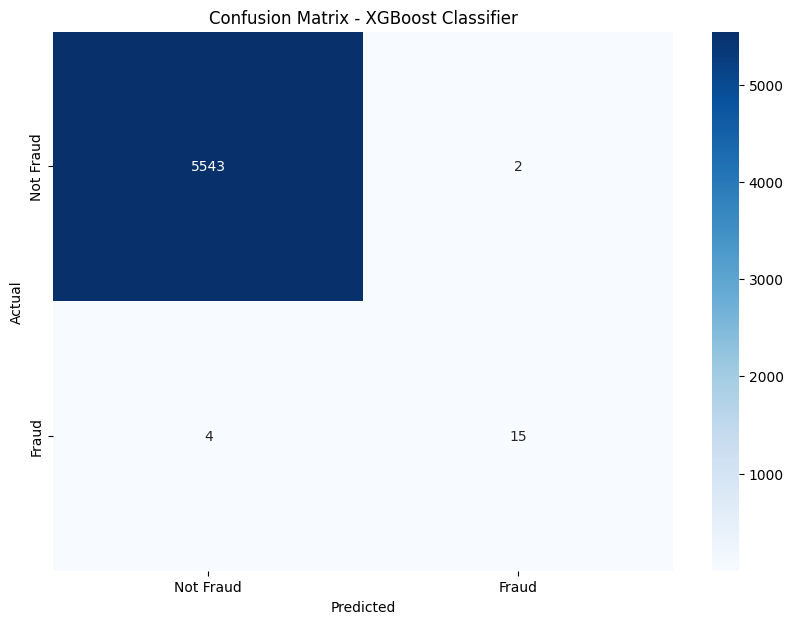

In [ ]:
#plot the matrix using the seaborn library. REFER: https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()


## Classification report of model

Print a classification report: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
#print classification report:

print("XGBoost Classification Report:")
print(classification_report(Y_test, Y_pred_xgb))



XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5545
         1.0       0.88      0.79      0.83        19

    accuracy                           1.00      5564
   macro avg       0.94      0.89      0.92      5564
weighted avg       1.00      1.00      1.00      5564

